I - Import data 

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import dates

In [2]:
df = pd.read_csv('../Docs/Etude_histo_car/scoring_hist.csv', ';')           # Load the csv file with the ';' delimiter

In [3]:
print(df.head())                                    # Print the 5 first rows of the dataframe 
print(len(df))

    number_id  count(*)  avg(A.prix)   ratio indicateur              table1
0     RENAULT    124826   11509.7766  0.2547     marque  SCORING_VO_2007_01
1     PEUGEOT     91926   12084.9526  0.1876     marque  SCORING_VO_2007_01
2     CITROEN     41442   10332.5825  0.0846     marque  SCORING_VO_2007_01
3  VOLKSWAGEN     29288   14160.0459  0.0598     marque  SCORING_VO_2007_01
4        FORD     20280    9914.1954  0.0414     marque  SCORING_VO_2007_01
10506


In [4]:
df2 = df.drop_duplicates('indicateur')              # Select unique indicateur 
print(df2['indicateur'])                            # Print the list of indicateur compute in the csv

0           marque
10          modele
20     carrosserie
30           annee
50      couleur_id
51    carburant_id
60             age
71              km
Name: indicateur, dtype: object


In [5]:
df3 = df.drop_duplicates('table1')                  # Select unique table 
print(len(df3['table1']))                           # Print the number of tables used in the study 

123


In [6]:
date = df.table1
date2 = [i.split('_') for i in date]
date = [i[2]+'-'+i[3] for i in date2]
months = [int(i[3]) for i in date2]
year = [int(i[2]) for i in date2]
df['Date']=date
df['Month']=months
df['Year']=year
df = df[df['Month']<13]
t1 = df[df['Year']>=2013]
t2 = df[(df['Year']==2012) & (df['Month']>10)]
#print(t2)
df = pd.concat([t2,t1],axis=0)
df = df.sort_values(by='Date')
print(df.head())

     number_id  count(*)  avg(A.prix)   ratio    indicateur  \
5424   RENAULT    250603    7854.2957  0.1977        marque   
5494    DIESEL    928135   12029.9020  0.7321  carburant_id   
5493        37       249   15254.2972  0.0002    couleur_id   
5492        21       264   13580.9848  0.0002    couleur_id   
5491        16       359   15264.4680  0.0003    couleur_id   

                  table1     Date  Month  Year  
5424  SCORING_VO_2012_11  2012-11     11  2012  
5494  SCORING_VO_2012_11  2012-11     11  2012  
5493  SCORING_VO_2012_11  2012-11     11  2012  
5492  SCORING_VO_2012_11  2012-11     11  2012  
5491  SCORING_VO_2012_11  2012-11     11  2012  


In [7]:
df_marque = df[df['indicateur']=='marque']
print(df_marque.head())
print(len(df_marque))
print(df_marque.number_id.unique())

     number_id  count(*)  avg(A.prix)   ratio indicateur              table1  \
5424   RENAULT    250603    7854.2957  0.1977     marque  SCORING_VO_2012_11   
5433       NaN     36392    5078.2932  0.0287     marque  SCORING_VO_2012_11   
5432      OPEL     44953    7898.9268  0.0355     marque  SCORING_VO_2012_11   
5431      FORD     48631    8468.2935  0.0384     marque  SCORING_VO_2012_11   
5430  MERCEDES     62866   17032.8476  0.0496     marque  SCORING_VO_2012_11   

         Date  Month  Year  
5424  2012-11     11  2012  
5433  2012-11     11  2012  
5432  2012-11     11  2012  
5431  2012-11     11  2012  
5430  2012-11     11  2012  
520
['RENAULT' nan 'OPEL' 'FORD' 'MERCEDES' 'AUDI' 'BMW' 'VOLKSWAGEN' 'CITROEN'
 'PEUGEOT' 'FIAT' 'NISSAN']


['RENAULT' nan 'OPEL' 'FORD' 'MERCEDES' 'AUDI' 'BMW' 'VOLKSWAGEN' 'CITROEN'
 'PEUGEOT' 'FIAT' 'NISSAN']


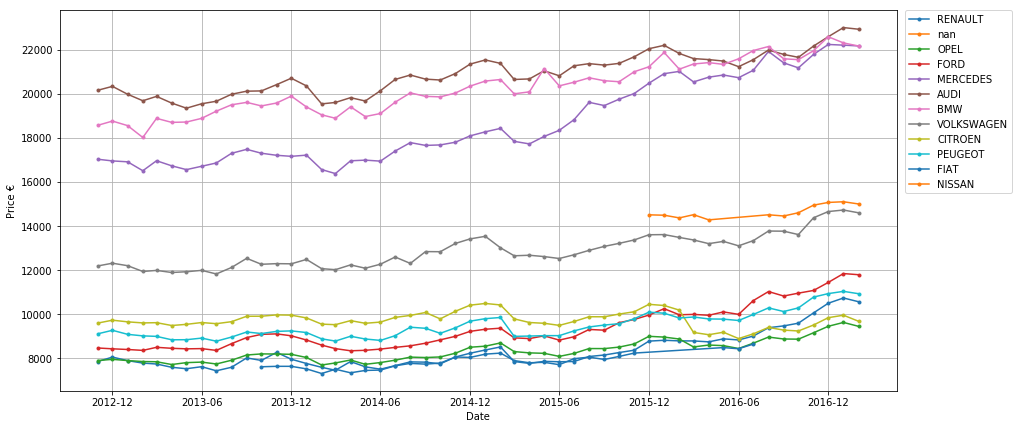

In [8]:
brand = df_marque['number_id'].unique()
print(brand)
fig = plt.figure(figsize=(15,7))
for i in brand:
    df_brand = df_marque[df_marque['number_id']==i]
    #print(len(df_brand))
    if(len(df_brand)<1):
        pass
    plt.plot_date(df_brand.Date, df_brand['avg(A.prix)'], '.-', label=i)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Price €')
plt.grid(True)

In [9]:
import matplotlib.gridspec as gridspec

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


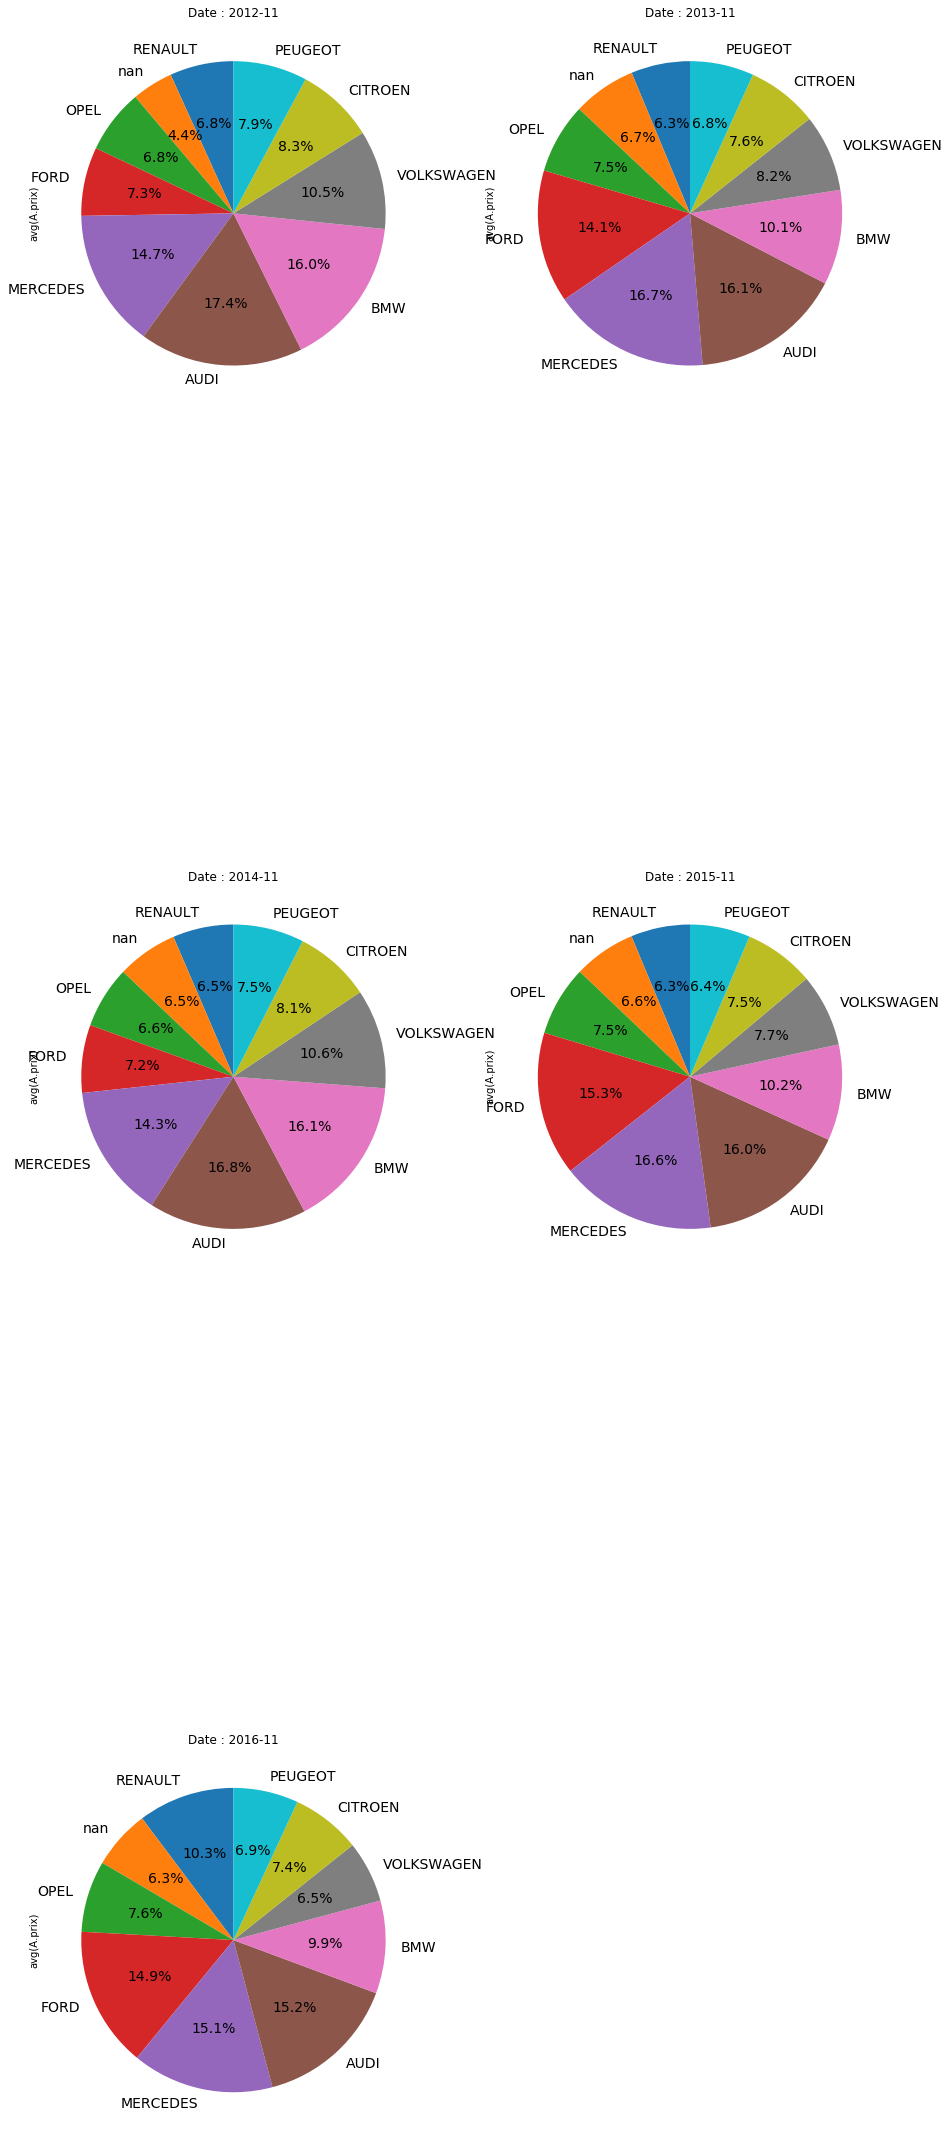

In [10]:
df_test = df_marque[df['Date']=='2012-11']
df_test2 = df_marque[df['Date']=='2013-11']
df_test3 = df_marque[df['Date']=='2014-11']
df_test4 = df_marque[df['Date']=='2015-11']
df_test5 = df_marque[df['Date']=='2016-11']

fig = plt.figure( figsize=(15,45))
gs = gridspec.GridSpec(3, 2)
#gs.update(left=0.5, right=0.5, wspace=0.05)

#ax1 = plt.subplot(121, aspect='equal')
ax1 = plt.subplot(gs[0, 0], aspect='equal')
df_test.plot(kind='pie', y='avg(A.prix)', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_test['number_id'],legend = False, fontsize=14)
plt.title('Date : 2012-11')
#ax2 = plt.subplot(122, aspect='equal')
ax2 = plt.subplot(gs[0, 1], aspect='equal')
df_test2.plot(kind='pie', y='avg(A.prix)', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_test['number_id'],legend = False, fontsize=14)
plt.title('Date : 2013-11')
#ax3 = plt.subplot(221, aspect='equal')
ax3 = plt.subplot(gs[1, 0], aspect='equal')
df_test3.plot(kind='pie', y='avg(A.prix)', ax=ax3, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_test['number_id'],legend = False, fontsize=14)
plt.title('Date : 2014-11')
#ax4 = plt.subplot(222, aspect='equal')
ax4 = plt.subplot(gs[1, 1], aspect='equal')
df_test4.plot(kind='pie', y='avg(A.prix)', ax=ax4, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_test['number_id'],legend = False, fontsize=14)
plt.title('Date : 2015-11')

#ax5 = plt.subplot(331, aspect='equal')
ax5 = plt.subplot(gs[2, 0], aspect='equal')
df_test5.plot(kind='pie', y='avg(A.prix)', ax=ax5, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_test['number_id'],legend = False, fontsize=14)
plt.title('Date : 2016-11')



#plt.legend()

In [11]:
df_model = df[df['indicateur']=='modele']
print(df_model.head())

     number_id  count(*)  avg(A.prix)   ratio indicateur              table1  \
5443       308     20437   13539.0925  0.0161     modele  SCORING_VO_2012_11   
5442       206     22609    4212.4922  0.0178     modele  SCORING_VO_2012_11   
5441    LAGUNA     22905    7776.2988  0.0181     modele  SCORING_VO_2012_11   
5440      GOLF     27262   10202.1153  0.0215     modele  SCORING_VO_2012_11   
5439   SERIE 3     27718   15941.7045  0.0219     modele  SCORING_VO_2012_11   

         Date  Month  Year  
5443  2012-11     11  2012  
5442  2012-11     11  2012  
5441  2012-11     11  2012  
5440  2012-11     11  2012  
5439  2012-11     11  2012  


In [12]:
newdf = df_model[['number_id','avg(A.prix)']].groupby('number_id').mean()

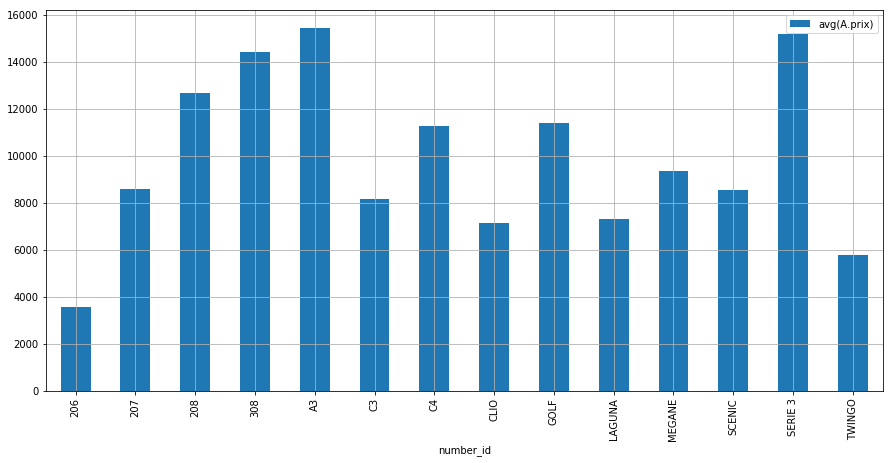

In [13]:
newdf.plot(kind='bar',figsize=(15,7), grid=True)

['308' '206' 'LAGUNA' 'GOLF' 'SERIE 3' 'SCENIC' '207' 'MEGANE' 'CLIO' nan
 'TWINGO' 'C3' 'A3' 'C4' '208']


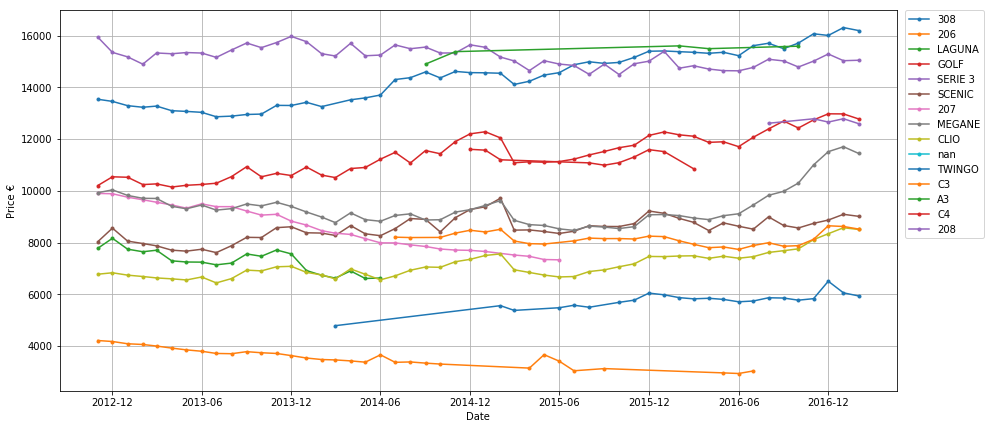

In [14]:
brand = df_model['number_id'].unique()
print(brand)
fig = plt.figure(figsize=(15,7))
for i in brand:
    df_brand = df_model[df_model['number_id']==i]
    #print(len(df_brand))
    if(len(df_brand)<1):
        pass
    plt.plot_date(df_brand.Date, df_brand['avg(A.prix)'], '.-', label=i)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Price €')
plt.grid(True)

In [15]:
df_age = df[df['indicateur']=='age']
print(df_age.head())

     number_id  count(*)  avg(A.prix)   ratio indicateur              table1  \
5515   <10 ans     52117    6299.8965  0.0411        age  SCORING_VO_2012_11   
5514    <9 ans     62478    7399.9598  0.0493        age  SCORING_VO_2012_11   
5513    <8 ans     68400    8785.9876  0.0540        age  SCORING_VO_2012_11   
5512    <7 ans     78373   10263.9295  0.0618        age  SCORING_VO_2012_11   
5511    <6 ans     95589   12218.7442  0.0754        age  SCORING_VO_2012_11   

         Date  Month  Year  
5515  2012-11     11  2012  
5514  2012-11     11  2012  
5513  2012-11     11  2012  
5512  2012-11     11  2012  
5511  2012-11     11  2012  


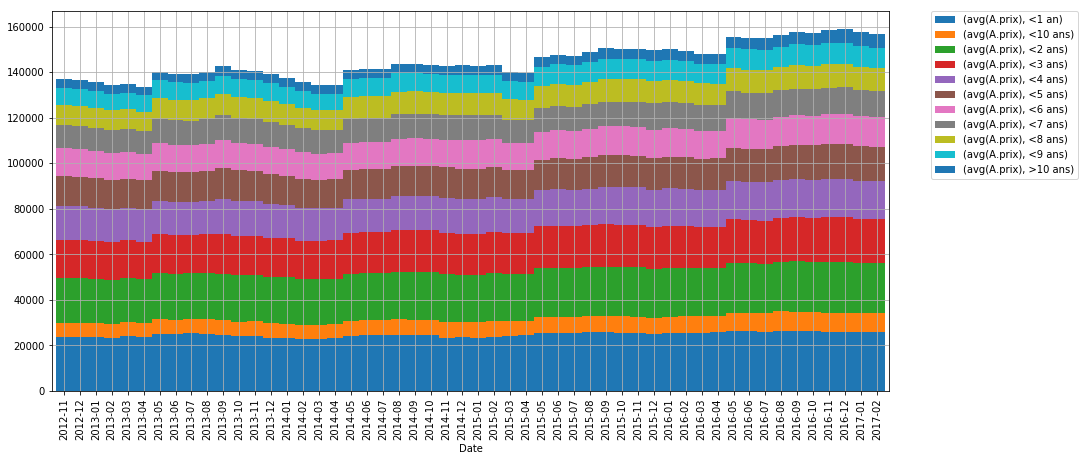

In [16]:
newdf = df_age[['number_id','avg(A.prix)','Date']].groupby(['Date', 'number_id']).mean()
#newdf.unstack(level=1).plot(kind='bar', width=1,  figsize=(15,7), grid=True)
newdf.unstack(level=1).plot(kind='bar', width=1, stacked=True, figsize=(15,7), grid=True)
#newdf.plot(kind='bar', stacked=True, figsize=(15,7), grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#newdf.plot(kind='bar',stacked=True, figsize=(15,7), grid=True)
#ind = np.arange(len(df_age))
#plt.bar(ind, newdf.Date)

['<10 ans' '<9 ans' '<8 ans' '<7 ans' '<6 ans' '<1 an' '<5 ans' '<4 ans'
 '<3 ans' '<2 ans' '>10 ans']


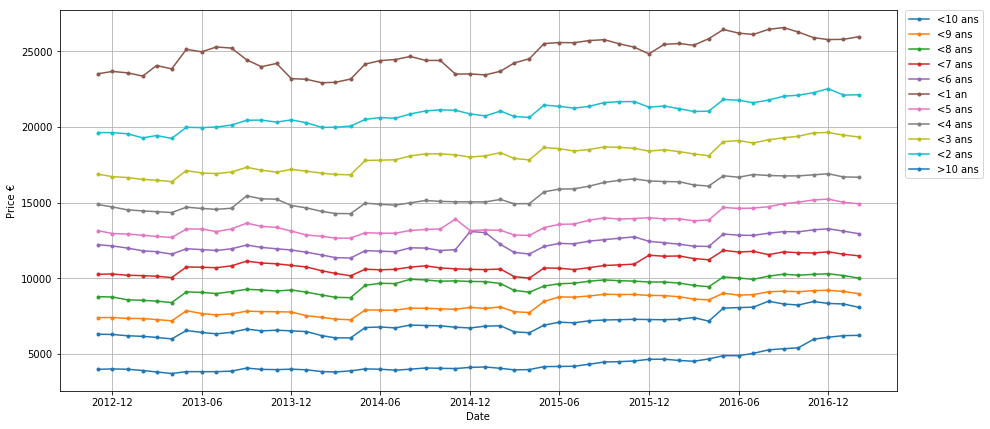

In [17]:
brand = df_age['number_id'].unique()
print(brand)
fig = plt.figure(figsize=(15,7))
for i in brand:
    df_brand = df_age[df_age['number_id']==i]
    #print(len(df_brand))
    if(len(df_brand)<1):
        pass
    plt.plot_date(df_brand.Date, df_brand['avg(A.prix)'], '.-', label=i)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Price €')
plt.grid(True)

In [18]:
#temp3 = pd.crosstab([df_age.Date, df_age.number_id], df_age['avg(A.prix)'])
#temp3.plot(kind='bar', stacked=True, grid=True)

In [19]:
df_km = df[df['indicateur']=='km']
print(df_km.head())

        number_id  count(*)  avg(A.prix)   ratio indicateur  \
5520   <10000 KMS    116701   21891.6905  0.0921         km   
5519  >200000 KMS    160589    3158.7488  0.1267         km   
5518   <50000 KMS    285730   18143.7436  0.2254         km   
5517  <100000 KMS    294190   12326.2529  0.2321         km   
5516  <200000 KMS    448171    6710.2745  0.3535         km   

                  table1     Date  Month  Year  
5520  SCORING_VO_2012_11  2012-11     11  2012  
5519  SCORING_VO_2012_11  2012-11     11  2012  
5518  SCORING_VO_2012_11  2012-11     11  2012  
5517  SCORING_VO_2012_11  2012-11     11  2012  
5516  SCORING_VO_2012_11  2012-11     11  2012  


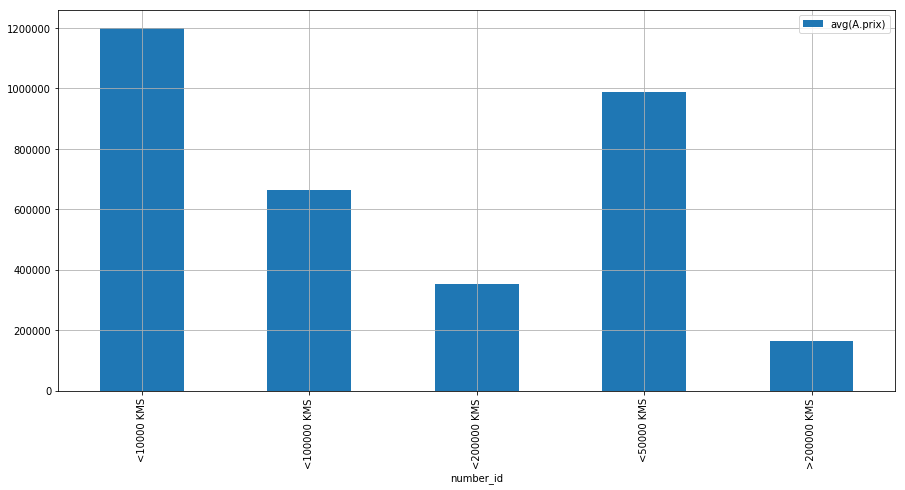

In [20]:
newdf = df_km[['number_id','avg(A.prix)']].groupby('number_id').sum()
newdf.plot(kind='bar',figsize=(15,7), grid=True)

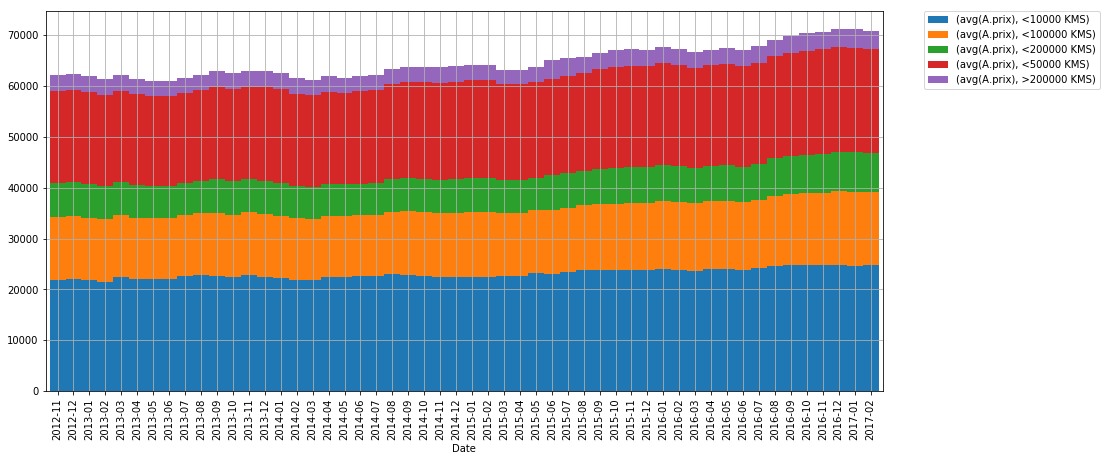

In [21]:
newdf = df_km[['number_id','avg(A.prix)','Date']].groupby(['Date', 'number_id']).mean()
#newdf.unstack(level=1).plot(kind='bar', width=1,  figsize=(15,7), grid=True)
newdf.unstack(level=1).plot(kind='bar', width=1, stacked=True, figsize=(15,7), grid=True)
#newdf.plot(kind='bar', stacked=True, figsize=(15,7), grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



['<10000 KMS' '>200000 KMS' '<50000 KMS' '<100000 KMS' '<200000 KMS']


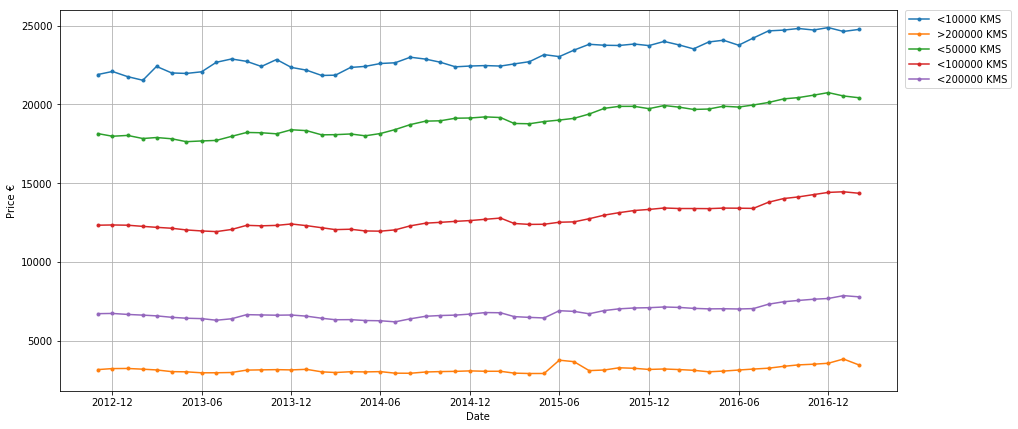

In [22]:
brand = df_km['number_id'].unique()
print(brand)
fig = plt.figure(figsize=(15,7))
for i in brand:
    df_brand = df_km[df_km['number_id']==i]
    #print(len(df_brand))
    if(len(df_brand)<1):
        pass
    plt.plot_date(df_brand.Date, df_brand['avg(A.prix)'], '.-', label=i)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Price €')
plt.grid(True)

In [23]:
df_carrosserie = df[df['indicateur']=='carrosserie']
print(df_carrosserie.head())

      number_id  count(*)  avg(A.prix)   ratio   indicateur  \
5445    BERLINE    351858   11723.3788  0.2775  carrosserie   
5444        NaN    403053    7553.6276  0.3179  carrosserie   
5446  MONOSPACE    178625   11082.2286  0.1409  carrosserie   
5447        4X4     85435   22083.9943  0.0674  carrosserie   
5448      BREAK     81307   12849.9268  0.0641  carrosserie   

                  table1     Date  Month  Year  
5445  SCORING_VO_2012_11  2012-11     11  2012  
5444  SCORING_VO_2012_11  2012-11     11  2012  
5446  SCORING_VO_2012_11  2012-11     11  2012  
5447  SCORING_VO_2012_11  2012-11     11  2012  
5448  SCORING_VO_2012_11  2012-11     11  2012  


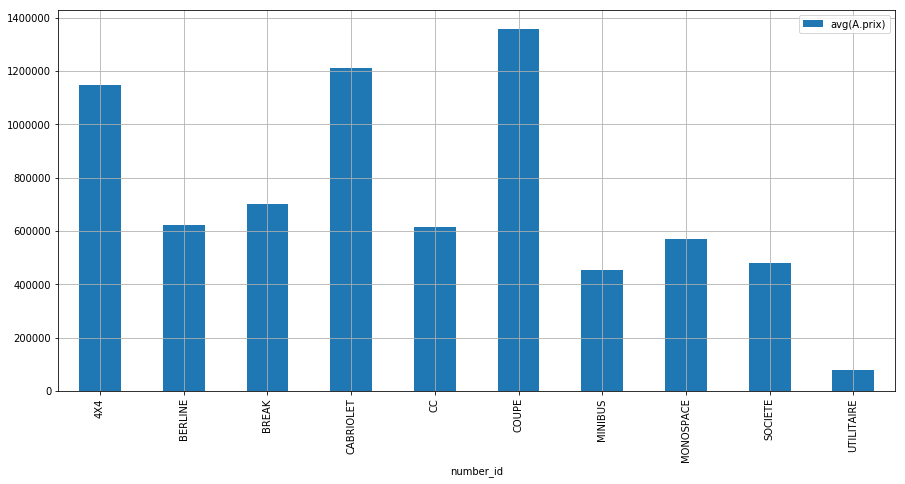

In [24]:
newdf = df_carrosserie[['number_id','avg(A.prix)']].groupby('number_id').sum()
newdf.plot(kind='bar',figsize=(15,7), grid=True)

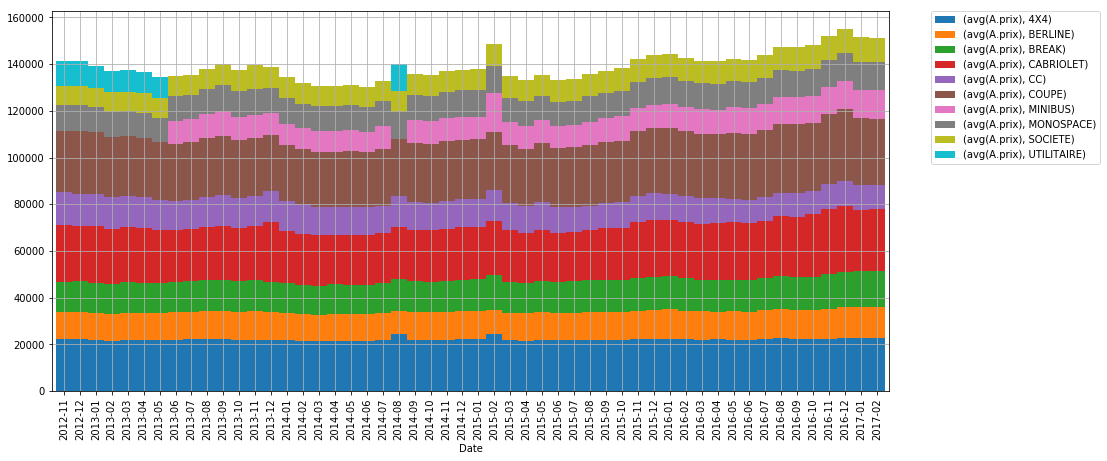

In [25]:
newdf = df_carrosserie[['number_id','avg(A.prix)','Date']].groupby(['Date', 'number_id']).mean()

#newdf.unstack(level=1).plot(kind='bar', width=1,  figsize=(15,7), grid=True)
newdf.unstack(level=1).plot(kind='bar', width=1, stacked=True, figsize=(15,7), grid=True)
#newdf.plot(kind='bar', stacked=True, figsize=(15,7), grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



['BERLINE' nan 'MONOSPACE' '4X4' 'BREAK' 'SOCIETE' 'UTILITAIRE' 'CC'
 'CABRIOLET' 'COUPE' 'MINIBUS']


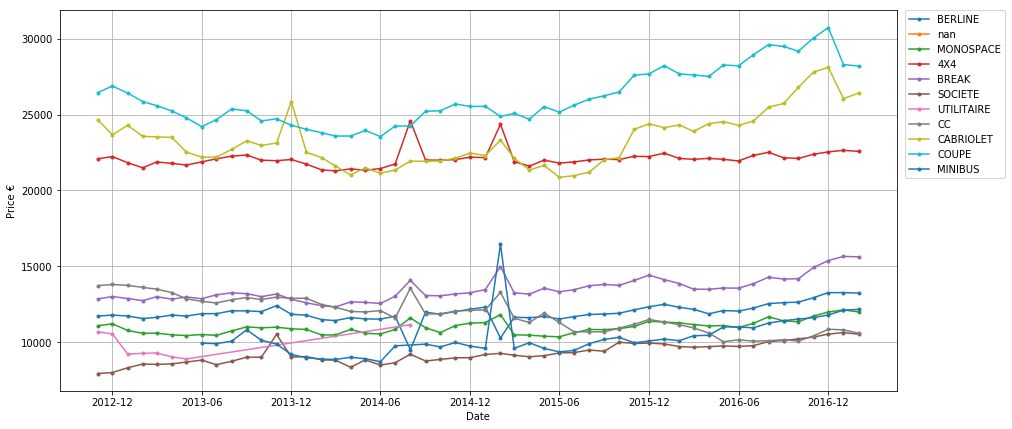

In [26]:
brand = df_carrosserie['number_id'].unique()
print(brand)
fig = plt.figure(figsize=(15,7))
for i in brand:
    df_brand = df_carrosserie[df_carrosserie['number_id']==i]
    #print(len(df_brand))
    if(len(df_brand)<1):
        pass
    plt.plot_date(df_brand.Date, df_brand['avg(A.prix)'], '.-', label=i)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Price €')
plt.grid(True)